#### Загрузка данных

In [2]:
import pandas as pd


df = pd.read_csv("data/wh_data.csv", index_col=0)
df

Height     Weight
0    167.0812  51.242630
1    181.6608  61.900227
2    176.2760  69.401361
3    173.2788  64.553288
4    172.1866  65.442177
..        ...        ...
195  167.1320  54.802721
196  167.9194  52.507937
197  173.3296  58.185941
198  172.7708  57.809524
199  181.3306  57.995465

[200 rows x 2 columns]

#### Обучение модели линейной регрессии

In [3]:
from sklearn import linear_model


num_records = df.shape[0]
X = df["Height"].to_numpy().reshape(num_records, 1)
y = df["Weight"].to_numpy().reshape(num_records, 1)

model = linear_model.LinearRegression().fit(X, y)
display(f"weight = {model.intercept_[0]} + {model.coef_.T[0][0]} * height") # type: ignore

'weight = -48.08512764117069 + 0.6129012675686306 * height'

В среднем на каждый килограмм приходится 0,6 см роста.

#### Оценка ошибки работы модели

In [4]:
from sklearn import metrics


y_pred = model.predict(X)
mae = metrics.mean_absolute_error(y, y_pred)
display(f"MAE = {mae}")

'MAE = 3.518701759813252'

В среднем предсказание отстает от фактического значения на 3,5 кг.

#### Визуализация результатов

Text(0, 0.5, 'Вес, кг')

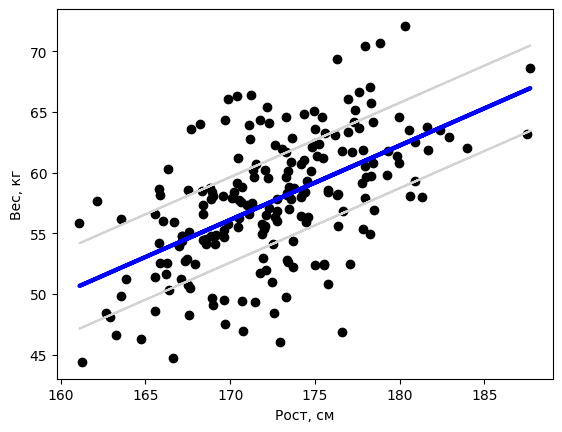

In [5]:
import matplotlib.pyplot as plt


plt.scatter(X, y, color='black')
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.plot(X, y_pred + mae, color='lightgray')
plt.plot(X, y_pred - mae, color='lightgray')
plt.xlabel('Рост, см')
plt.ylabel('Вес, кг')

#### Определение линейной зависимости (линейная корреляция)

In [6]:
from scipy import stats


corr, pval = stats.pearsonr(X[:,0], y[:,0])

display(corr)
display(pval)
display(f"{pval} < 0.05")

0.5568647346122992

1.1029015151266403e-17

'1.1029015151266403e-17 < 0.05'

corr > 0, значит обнаружена линейная зависимость между x и y

corr -> 1, присутствует сильная корреляция

pval < 5%, значит корреляция присутствует
